In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [6]:
class BatsmanState (TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    balls_per_boundary: float
    boundary_percentage: float
    summary: str

In [13]:
def calculate_strike_rate(state: BatsmanState):
    
    strike_rate = state['runs'] * 100.0 / state['balls']

    return {'strike_rate': strike_rate}

In [14]:
def calculate_balls_per_boundary(state: BatsmanState):
    
    balls_per_boundary = state['balls'] / (state['sixes'] + state['fours'])

    return {'balls_per_boundary': balls_per_boundary}

In [20]:
def calculate_boundary_percentage(state: BatsmanState):
    
    boundary_percentage =  ((state['fours'] * 4) + (state['sixes'] * 6)) * 100.0 / state['runs']

    return {'boundary_percentage': boundary_percentage}

In [21]:
def summary(state: BatsmanState):
    
    summary = f"""
Strike rate - {state['strike_rate']} \n
Balls per boundary - {state['balls_per_boundary']} \n
Boundary percentage - {state['boundary_percentage']} \n 
"""
    
    return {'summary': summary}

In [22]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)

graph.add_edge(START, 'calculate_balls_per_boundary')
graph.add_edge(START, 'calculate_boundary_percentage')
graph.add_edge(START, 'calculate_strike_rate')

graph.add_edge('calculate_balls_per_boundary', 'summary')
graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()


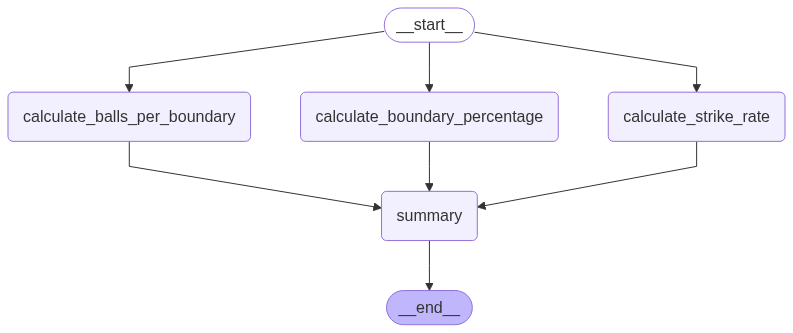

In [23]:
workflow

In [24]:
initial_state = {
    'runs' : 76,
    'balls' : 50,
    'fours' : 1,
    'sixes' : 5
}

workflow.invoke(initial_state)

{'runs': 76,
 'balls': 50,
 'fours': 1,
 'sixes': 5,
 'strike_rate': 152.0,
 'balls_per_boundary': 8.333333333333334,
 'boundary_percentage': 44.73684210526316,
 'summary': '\nStrike rate - 152.0 \n\nBalls per boundary - 8.333333333333334 \n\nBoundary percentage - 44.73684210526316 \n \n'}